<a href="https://colab.research.google.com/github/aoforfie/BAH_TechEx_Guided_Project_Phase2/blob/main/Guided_Project_2_Handwritten_Digit_Recognition_with_a_Simple_CNN_AOwusuForfie_and_MMoreno_04_16_2024_V10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Handwritten Digit Recognition with a Simple CNN

# CONTRIBUTORS: Afia Owusu-Forfie and Martin Moreno
# DATE(S): April 8, 2024 & April 12, 2024 -- April 16, 2024

## Project Overview

This project focuses on the development and understanding of a Convolutional Neural Network (CNN) for recognizing handwritten digits using the MNIST dataset. It is structured to provide a comprehensive introduction to deep learning techniques and their practical applications. Participants will engage in:

* **Setting up a Python project environment**, emphasizing the importance of virtual environments for effective dependency management in machine learning initiatives.
* **Performing data collection and preprocessing**, which includes normalization, reshaping, and batching of image data, essential steps for the successful application of machine learning models.
* **Designing and refining a CNN architecture**, where participants will gain hands-on experience in neural network design, layer configuration, and model compilation specific to image recognition tasks.
* **Conducting model training and evaluation**, teaching participants to apply training procedures, assess performance metrics, and gauge model accuracy on test data.
* **Executing results analysis and model optimization**, aimed at enhancing model performance through methods such as hyperparameter tuning and data augmentation, while mitigating common issues like overfitting.
* **Preparing the model for deployment**, which covers model conversion for production environments, development of an interaction interface, and comprehensive project documentation for future scalability and reproducibility.

The project aims to build proficiency in utilizing TensorFlow and Keras, equipping participants with the necessary skills to develop, train, and deploy effective machine learning models. Emphasis is placed on following best practices for machine learning project workflows, from data preprocessing to deployment, ensuring participants are well-prepared to handle a variety of data science challenges.

**Estimated Completion Time**

12 to 14 hours


## Task 1: Project Setup and Environment Preparation

**Objective:** Set up the project environment and install necessary libraries to ensure a smooth workflow.

**Activities:**

1. Install Python and necessary libraries (NumPy, TensorFlow/Keras, Matplotlib, etc.).
2. Set up a virtual environment for the project to manage dependencies.
3. Verify the installation by running a simple Python script.

**Estimated Completion Time:** 60 minutes

# Installing a Virtual Environment using Venv

In [1]:
!pip install virtualenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 32.9 MB/s eta 0:00:00


In [2]:
!python --version

Python 3.10.12


#Version of Python being used in this Google Colab
#Python 3.10.12

In [3]:
!python3.10.12 -m venv GuidedProject2

/bin/bash: line 1: python3.10.12: command not found


 **#NOTE: Above command only works for cmd: prompts so it did NOT work**

# 0. Installing and/or importing majority of the relevant libraries

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml
from scipy.ndimage.interpolation import shift #scipy.ndimage.interpolation is deprecated
from scipy.ndimage import shift

#Importing ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

from matplotlib.colors import LogNorm


from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

<ipython-input-4-66792c33ca63>:10: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift #scipy.ndimage.interpolation is deprecated


## **Task 2: Data Collection and Preprocessing**  

**Objective:** Gather and prepare the handwritten digits data for training and testing the CNN.  

**Activities:**  
1. Download the MNIST dataset.  
2. Normalize the image pixel values and reshape them for the CNN.  
3. Split the data into training, validation, and testing sets.  
4. Perform data augmentation to increase the diversity of the training set (e.g., rotations, translations).  
5. Implement data loaders for efficient loading and batching operations during training.  
6. Visualize the augmented images to verify the data augmentation process.  
7. Save the preprocessed data for easy access in subsequent training sessions.

**Estimated Completion Time:** 180 minutes

# 1. Downloading the MNIST dataset and splitting it into Training and Test datasets (X and y).

In [5]:
## Splitting the MNIST dataset into X_train, y_train and X_test, y_test at the same time downloading it.
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


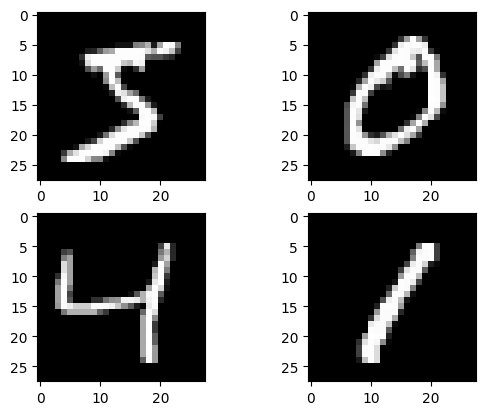

In [7]:
# plotting 4 images of the X_train data as grayscale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

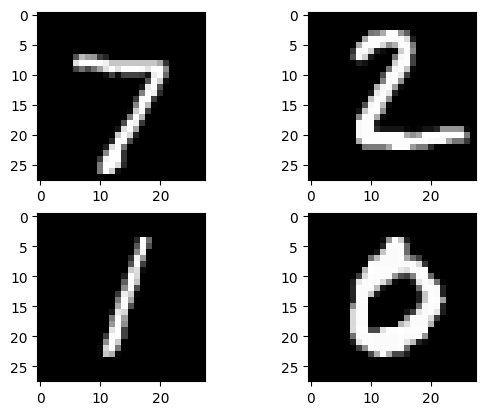

In [8]:
#plotting 4 images of the X_test data as grayscale
plt.subplot(221)
plt.imshow(X_test[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_test[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_test[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_test[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [9]:
## Looking at the shapes of the split datasets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [10]:
np.set_printoptions(linewidth=28 * 28)
i = 1
print(y_train[i])  # the class label == the actual digit

# Scroll down to see non-zero values that make up the grayscale image
# of number 0 as per the y_train[0] ground truth


0


In [11]:
print(X_train[i])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 18

In [12]:
np.set_printoptions(linewidth=28 * 28)
i = 1
print(X_test[i])  # the class label == the actual digit

# Scroll down to see non-zero values that make up the grayscale image
# of number 0 as per the y_train[0] ground truth

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   0   

In [13]:
# How many classes (unique digits)?
unique_labels = np.unique(y_train)
print (unique_labels)
num_classes = len(unique_labels)
print (num_classes)

[0 1 2 3 4 5 6 7 8 9]
10


# 2. Normalize the image pixel values

In [14]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [15]:
X_train_scaled

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [16]:
np.set_printoptions(linewidth=28 * 28)
i = 1
print(X_train_scaled[i])

[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        

In [17]:
X_test_scaled

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [18]:
np.set_printoptions(linewidth=28 * 28)
i = 1
print(X_test_scaled[i])

[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        

# Reshaping the data

In [19]:
X_train_scaled2 = X_train_scaled.reshape(60000,28,28,1)

# 3. Split the data into training, validation, and testing sets. *Of note, this step has already been accomplished simultaneously when we loaded the MNIST data in step 1. above.*


# 4. Performing data augmentation to increase the diversity of the training set (e.g., rotations, translations).

# **** We received counsel from Niranjan on April 8, 2024 to use the ImageDataGenerator() for the Data Augmentation instead of our original inclination to use ndimage.

In [ ]:
# # Method to shift the image by given dimension
# def shift_image(image, dx, dy):
#     image = image.reshape((28, 28))
#     shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
#     return shifted_image.reshape([-1])

In [ ]:
# # Creating Augmented Dataset
# X_train_augmented = [image for image in X_train_scaled]
# y_train_augmented = [image for image in y_train]

# for dx, dy in ((1,0), (-1,0), (0,1), (0,-1)):
#      for image, label in zip(X_train_scaled, y_train):
#              X_train_augmented.append(shift_image(image, dx, dy))
#              y_train_augmented.append(label)

In [ ]:
# X_train_augmented

In [ ]:
# y_train_augmented

In [ ]:
# def visualize(X_train, X_train_augmented):
#     fig = plt.figure()
#     plt.subplot(1,2,1)
#     plt.title('Original image')
#     plt.imshow(X_train)

#     plt.subplot(1,2,2)
#     plt.title('Augmented image')
#     plt.imshow(X_train_augmented)
#     flipped = tf.image.flip_left_right(image)
#     visualize(image, flipped)

In [ ]:
# X_train

In [ ]:
# print(y_train)

In [ ]:
# # Shuffle the dataset
# shuffle_idx = np.random.permutation(len(X_train_augmented))
# X_train_augmented = np.array(X_train_augmented)[shuffle_idx]
# y_train_augmented = np.array(y_train_augmented)[shuffle_idx]

In [ ]:
# X_train.shape

In [ ]:
# X_train_augmented_tensor = tf.convert_to_tensor(X_train_augmented, dtype = tf.float32)

In [ ]:
# y_train_augmented_tensor = tf.convert_to_tensor(y_train_augmented)

## 1st Alternative method to ImageDataGenerator() ends here

# **# Alternative 2 : 4. Performing data augmentation to increase the diversity of the training set (e.g., rotations, translations) with ImageDataGenerator().**

In [20]:
X_train_scaled2 = X_train_scaled.reshape(60000,28,28,1)

In [21]:
datagen = ImageDataGenerator(
    # rotation_range=35,  # randomly rotate images in the range (degrees, 0 to 180)
    rotation_range=35,
    width_shift_range=0.3,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.3,  # randomly shift images vertically (fraction of total height)
    zoom_range=0.2,  # randomly zoom into images
    fill_mode='nearest',  # fill in newly created pixels, which can appear after a rotation or a width/height shift
    validation_split = 0.2
)


# Fit the datagen object to our training data
datagen.fit(X_train_scaled2)

train_generator = datagen.flow(X_train_scaled2, y_train, batch_size=32, shuffle=True,seed=2, save_to_dir=None, subset='training')

# Generate a batch of augmented images from the dataset
validation_generator = datagen.flow(X_train_scaled2, batch_size=32, shuffle=True,seed=2, save_to_dir=None, subset='validation')


# # Plot the augmented images
# fig, axes = plt.subplots(1, 10, figsize=(20, 3))
# for img, ax in zip(validation_generator, axes):
#     ax.imshow(img.reshape(28, 28, 1), cmap='gray')
#     ax.axis('off')
# plt.tight_layout()
# plt.show()

### Beginning Anew at 2:33 PM ET On April 12, 2024




# 5. Implementing data loaders for efficient loading and batching operations during training.

#Run num_classes

In [22]:
num_classes = 10

# 6. Visualize the augmented images to verify the data augmentation process

In [23]:
## Visualizing import image data

In [24]:
np.set_printoptions(linewidth=28 * 28)
i = 1
print(y_train[i])  # the class label == the actual digit
print(X_train[i])
# Scroll down to see non-zero values that make up the grayscale image
# of number 0 as per the y_train[0] ground truth


0
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 

In [25]:
np.set_printoptions(linewidth=28 * 28)
i = 1
print(y_train[i])  # the class label == the actual digit
print(X_train_scaled2[i])
# Scroll down to see non-zero values that make up the grayscale image
# of number 0 as per the y_train[0] ground truth

0
[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0

# Saving the preprocessed data

## Making a zip file with extension .npz

In [26]:
np.savez_compressed('CNN_DATA',
                    X_train = X_train_scaled2,
                    X_test = X_test_scaled,
                    y_train = y_train,
                    y_test = y_test)

## Mounting an instance of Google Drive

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Changing Directory

In [29]:
%cd /content

/content


## Downloading the CNN_DATA.npz file for later upload on GitHub

In [31]:
from google.colab import files
files.download('CNN_DATA.npz')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
---

## **Task 3: Designing the CNN Architecture**  

**Objective:** Design a simple Convolutional Neural Network architecture suitable for handwritten digit recognition.  

**Activities:**

1. Define the CNN layers, including convolutional, activation, pooling, and fully connected layers.  
2. Choose activation functions and initialize weights.  
3. Configure the optimizer, loss function, and metrics for model compilation.  
4. Summarize the model to visualize the architecture and parameters.

**Estimated Completion Time:** 90 minutes

In [ ]:
# def build_model():
#    '''
#    Build a Sequential model with regular densely-connected NN layers.
#    Return the constructed model.
#   '''
#   model = keras.Sequential(name = 'Image_Classifier')

#   # The input layer
#   # We will use Flatten utility layer to flatten 2D images into 1D arrays
#   model.add(layers.Flatten(input_shape = (28,28,1)))

#   # Hidden Layers
#   model.add(layers.Dense(128, name = "HL1", activation = 'relu'))
#   model.add(layers.Dense(64, name = "HL2", activation = 'relu'))

#   # The model's output layer
#   # We create a classifier for as many classes (digits) as there are in the inout data
#   model.add(layers.Dense(num_classes, name = "OUTL", activation = 'softmax'))

#   model.summary()
#   print(model.inputs, model.outputs)
#   return model

In [ ]:
# def compile_model(model):

#   model.compile(
#       optimizer = SGD(learning_rate = .001, momentum=0.9, nesterov = True),

#       loss = keras.losses.SparseCategoricalCrossentropy(),
#       metrics = [keras.metrics.SparseCategoricalAccuracy()]
#   )
#   return model

In [ ]:
# def train(model):

#   history = model.fit(X_train, y_train, batch_size =128,
#                       epochs = 20, verbose = 1)
#   return history

In [ ]:
# # random generator
# tf.keras.utils.set_random_seed(42)

# #trigger sequence
# model = build_model()
# model = compile_model(model)
# history = train(model)


## **** Previous Joint Effort from Afia and Martin ended here on April 8, 2024 ****

## ****  Individual work with Afia begins on April 12, 2024 ****

# Building the Model

In [32]:
def build_model():
  '''
   Build a Sequential model with regular densely-connected NN layers.
   Return the constructed model.
  '''
  input_shape = (28, 28, 1)  # 1 is the count of channels (no RGB)

  model = keras.Sequential ([

    # // The input layer
    layers.Input(shape=input_shape),

    # // Hidden layers
    layers.Conv2D(128, kernel_size=(3, 3), activation="relu", name='CL1'),
    layers.MaxPooling2D(pool_size=(2, 2), name='MPL1'),

    layers.Conv2D(64, kernel_size=(3, 3), activation="relu", name='CL2'),
    layers.MaxPooling2D(pool_size=(2, 2), name='MPL2'),

    layers.Flatten(name='FL'),

    layers.Dropout(0.2),

    # // The model's output layer
    # We create a classifier for as many classes as there are in the input data
    #model.add(layers.Dense(num_classes, name="OUTL", activation='softmax'))
    layers.Dense(num_classes, name="OUTL", activation='softmax')
  ])

  model.summary()
  print (model.inputs, model.outputs)

  return model

# Compiling the Model

In [33]:
def compile_model(model):
  '''
    Compile the pre-built model with the model hyperparameters.
    Return the compiled model
  '''
  model.compile(
      #optimizer=keras.optimizers.RMSprop(),
      optimizer=SGD(learning_rate=1e-2, momentum=0.9, nesterov=True),

      # The loss function that we need to minimize
      loss=keras.losses.SparseCategoricalCrossentropy(),  # we have a lot of "holes" in the dataset (the black pixels with a value of 0)

      # The metrics (can be more than one) to monitor
      metrics=[keras.metrics.SparseCategoricalAccuracy()], # The "dangling" comma , before the closing bracket is good practice ...
  )

  return model

# Train the Model

In [34]:
def train(model):
  '''
    Train the model with a fixed number of epochs
    Return the history (log)
  '''
  # In a CPU-only CoLab environment, training may take about 5 minutes, give or take, so be patient and wait until the training is done ...
  history = model.fit(X_train_scaled2, y_train, batch_size = 128, epochs = 5, verbose=1)

  return history

In [ ]:
# augmented_data_loader
# augmented_images

In [ ]:
# def train(model):
#   '''
#     Train the model with a fixed number of epochs
#     Return the history (log)
#   '''
#   # In a CPU-only CoLab environment, training may take about 5 minutes, give or take, so be patient and wait until the training is done ...
#   history = model.fit_generator(augmented_data_loader, validation_data=augmented_images)

#   return history

#Seeding the random generator, triggering the sequence and training the model.

In [36]:
# Seed the random generator for reproducible results
tf.keras.utils.set_random_seed(2424)

# Trigger the sequence ..
model = build_model()
model = compile_model(model)
history = train(model)

# Note: CoLab reports the wall time of running a cell at the bottom of the browser window

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CL1 (Conv2D)                (None, 26, 26, 128)       1280      
                                                                 
 MPL1 (MaxPooling2D)         (None, 13, 13, 128)       0         
                                                                 
 CL2 (Conv2D)                (None, 11, 11, 64)        73792     
                                                                 
 MPL2 (MaxPooling2D)         (None, 5, 5, 64)          0         
                                                                 
 FL (Flatten)                (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)              0         
                                                                 
 OUTL (Dense)                (None, 10)               

In [37]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 8s 25ms/step - loss: 0.0501 - sparse_categorical_accuracy: 0.9841


[0.05009949207305908, 0.9840999841690063]

# Make Predictions

In [38]:
y_pred_prob = model.predict(X_test_scaled)
y_pred_prob.shape

313/313 [==============================] - 8s 25ms/step


(10000, 10)

In [39]:
np.argmax(y_pred_prob[0]) == y_test[0] == 7

True

In [40]:
y_pred_labels = np.zeros(len(y_pred_prob), dtype=int)
for i in range(len(y_pred_prob)):
  y_pred_labels[i] = np.argmax(y_pred_prob[i])

print (y_pred_labels[:31])
print ('-' * 60)
print (y_test[:31])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 8 4 9 6 6 5 4 0 7 4 0 1 3]
------------------------------------------------------------
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3]


## Including the augmented data

In [ ]:
# rank = np.linalg.matrix_rank(X_train_scaled)
# print(f"The rank of the matrix is {rank}.")

The rank of the matrix is [20 17 13 ... 17 18 19].


### Previously failed attempt to run the model

In [ ]:
# X_train_scaled = X_train_scaled.reshape(1, 60000, 28 , 28)

In [ ]:
# datagen.fit(X_train_scaled2)

# train_generator = datagen.flow(X_train_scaled2, y_train, batch_size=64, shuffle=True,
#                                seed=2, save_to_dir=None, subset='training')

# validation_generator = datagen.flow(X_train_scaled2, y_train, batch_size=64, shuffle=True,
#                                seed=2, save_to_dir=None, subset='validation')


# history = model.fit_generator(train_generator,
#                                                 steps_per_epoch = 600,
#                                                 epochs=30,
#                                                 validation_data = validation_generator,
#                                                 validation_steps = 150,
#                                                 )

In [ ]:
# # Seed the random generator for reproducible results
# tf.keras.utils.set_random_seed(2424)

# # Trigger the sequence ..
# model = build_model()
# model = compile_model(model)
# history = train(model)

# # Note: CoLab reports the wall time of running a cell at the bottom of the browser window

### Failed attempt ends here

# Trying the Augmented Data but knowing that it would have great impact on the Model's Accuracy

**## Re-running the Train portion with new augmented images**

In [41]:
def train(model):
  '''
    Train the model with a fixed number of epochs
    Return the history (log)
  '''
  # In a CPU-only CoLab environment, training may take about 5 minutes, give or take, so be patient and wait until the training is done ...
  history = model.fit_generator(train_generator, validation_data = validation_generator, epochs = 5, verbose=1)

  return history

In [42]:
# Trigger the sequence ..
model = build_model()
model = compile_model(model)
history = train(model)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CL1 (Conv2D)                (None, 26, 26, 128)       1280      
                                                                 
 MPL1 (MaxPooling2D)         (None, 13, 13, 128)       0         
                                                                 
 CL2 (Conv2D)                (None, 11, 11, 64)        73792     
                                                                 
 MPL2 (MaxPooling2D)         (None, 5, 5, 64)          0         
                                                                 
 FL (Flatten)                (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)              0         
                                                                 
 OUTL (Dense)                (None, 10)               

<ipython-input-41-8bbaa9f805ff>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, validation_data = validation_generator, epochs = 5, verbose=1)


Epoch 1/5
1500/1500 [==============================] - 158s 105ms/step - loss: 1.5474 - sparse_categorical_accuracy: 0.4643 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/5
1500/1500 [==============================] - 159s 106ms/step - loss: 0.8297 - sparse_categorical_accuracy: 0.7334 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 3/5
1500/1500 [==============================] - 165s 110ms/step - loss: 0.6564 - sparse_categorical_accuracy: 0.7912 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 4/5
1500/1500 [==============================] - 160s 106ms/step - loss: 0.5595 - sparse_categorical_accuracy: 0.8240 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 5/5
1500/1500 [==============================] - 161s 107ms/step - loss: 0.5162 - sparse_categorical_accuracy: 0.8395 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.0000e+00


**OBSERVATION: The augmented images does NOT seem to help the model. The model lost accuracy from 0.9825 to become 0.8666. Also the loss was smaller 0.0569 compared to the increased loss of 0.4343 when the images were augmented. This means more model tuning will be necessary**

**UPDATED OBSERVATION AFTER RE-RUNS: The augmented images does NOT seem to help the model. The model lost accuracy from 0.9825 to become 0.8395. Also the loss was smaller 0.0569 compared to the increased loss of 0.5162 when the images were augmented. This means more model tuning will be necessary**


## **Task 4: Model Training and Evaluation**  

**Objective:** Train the CNN with the training data and evaluate its performance on the test set.  

**Activities:**

1. Integrate TensorBoard callbacks for real-time tracking of training metrics.
2. Set up callbacks for model checkpoints, early stopping, and learning rate adjustments.  
3. Train the model with the training set while validating on the validation set.  
4. Use TensorBoard to plot training and validation loss and accuracy.  
5. Evaluate the model on the test set to assess its generalization capability.  
6. Perform error analysis by reviewing misclassified images to understand the model's weaknesses.  
7. Test the model with external images (e.g., hand-drawn digits) to further assess its performance.

**Estimated Completion Time:** 300 minutes

# 1. Integrate TensorBoard callbacks for real-time tracking of training metrics.

In [43]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import datetime


# 2. Set up callbacks for model checkpoints, early stopping, and learning rate adjustments.

In [44]:
# Setup TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

#3. Train the model with the training set while validating on the validation set.

In [45]:
# Train the model
model.fit(X_train_scaled2, y_train, epochs=5, validation_data=(X_test_scaled, y_test), callbacks=[tensorboard_callback])


Epoch 1/5
1875/1875 [==============================] - 185s 99ms/step - loss: 0.0646 - sparse_categorical_accuracy: 0.9797 - val_loss: 0.0284 - val_sparse_categorical_accuracy: 0.9906
Epoch 2/5
1875/1875 [==============================] - 187s 100ms/step - loss: 0.0370 - sparse_categorical_accuracy: 0.9883 - val_loss: 0.0248 - val_sparse_categorical_accuracy: 0.9911
Epoch 3/5
1875/1875 [==============================] - 182s 97ms/step - loss: 0.0308 - sparse_categorical_accuracy: 0.9905 - val_loss: 0.0209 - val_sparse_categorical_accuracy: 0.9934
Epoch 4/5
1875/1875 [==============================] - 188s 100ms/step - loss: 0.0257 - sparse_categorical_accuracy: 0.9916 - val_loss: 0.0256 - val_sparse_categorical_accuracy: 0.9914
Epoch 5/5
1875/1875 [==============================] - 186s 99ms/step - loss: 0.0238 - sparse_categorical_accuracy: 0.9925 - val_loss: 0.0242 - val_sparse_categorical_accuracy: 0.9930


In [46]:
%cd /content/logs

/content/logs


In [47]:
!zip -r logs.zip /content/logs

  adding: content/logs/ (stored 0%)
  adding: content/logs/fit/ (stored 0%)
  adding: content/logs/fit/20240417-004128/ (stored 0%)
  adding: content/logs/fit/20240417-004128/train/ (stored 0%)
  adding: content/logs/fit/20240417-004128/train/events.out.tfevents.1713314598.86ff6ece5a5f.1603.0.v2 (deflated 77%)
  adding: content/logs/fit/20240417-004128/validation/ (stored 0%)
  adding: content/logs/fit/20240417-004128/validation/events.out.tfevents.1713314775.86ff6ece5a5f.1603.1.v2 (deflated 68%)


In [48]:
from google.colab import files
files.download('logs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
# Setup TensorBoard callback
log_dir2 = "logs2/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback2 = tf.keras.callbacks.TensorBoard(log_dir=log_dir2, histogram_freq=1)

In [50]:
model.fit_generator(train_generator, validation_data = validation_generator, epochs = 5, verbose=1, callbacks=[tensorboard_callback2])

Epoch 1/5


<ipython-input-50-c85d52a8140f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, validation_data = validation_generator, epochs = 5, verbose=1, callbacks=[tensorboard_callback2])


1500/1500 [==============================] - 165s 110ms/step - loss: 0.5392 - sparse_categorical_accuracy: 0.8294 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/5
1500/1500 [==============================] - 160s 107ms/step - loss: 0.4504 - sparse_categorical_accuracy: 0.8589 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 3/5
1500/1500 [==============================] - 160s 106ms/step - loss: 0.4328 - sparse_categorical_accuracy: 0.8651 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 4/5
1500/1500 [==============================] - 158s 106ms/step - loss: 0.4103 - sparse_categorical_accuracy: 0.8711 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 5/5
1500/1500 [==============================] - 158s 105ms/step - loss: 0.3955 - sparse_categorical_accuracy: 0.8771 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.0000e+00


# 4. Use TensorBoard to plot training and validation loss and accuracy.

In [53]:
%cd /content

/content


In [55]:
%reload_ext tensorboard
%tensorboard --logdir=logs/fit


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2024-04-17 01:28:24.273817: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server with a different port.

# The original logs folder was renamed to logs1 so that the new model with augmented images using TensorBoard will replace it (ie logs). This was done so the images from TensorBoard could show for both the normalized data versus the normalized AND augmented data for comparison analysis purposes.

In [52]:
%reload_ext tensorboard
%tensorboard --logdir=logs/fit

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2024-04-17 01:27:08.255429: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server with a different port.

#5. Evaluate the model on the test set to assess its generalization capability.

**# The second model performs poorly than the first model**

# The confusion matrix

# Evaluate Model's Performance on the Test Data

In [ ]:
cf = tf.math.confusion_matrix(y_pred_labels, y_test)
print (cf)

tf.Tensor(
[[ 975    0    3    0    1    1    6    0    5    4]
 [   0 1130    3    0    1    0    2    5    0    5]
 [   0    1 1019    5    1    1    1   15    2    1]
 [   0    1    0  989    0    3    0    2    1    1]
 [   0    0    1    0  965    0    2    0    1    1]
 [   1    0    0    7    0  883    4    0    1    5]
 [   1    1    0    0    0    1  941    0    1    0]
 [   1    1    2    5    0    1    0  993    3    2]
 [   2    1    4    4    3    2    2    3  956    0]
 [   0    0    0    0   11    0    0   10    4  990]], shape=(10, 10), dtype=int32)


In [ ]:
cf_np = cf.numpy(); cf_np

array([[ 975,    0,    3,    0,    1,    1,    6,    0,    5,    4],
       [   0, 1130,    3,    0,    1,    0,    2,    5,    0,    5],
       [   0,    1, 1019,    5,    1,    1,    1,   15,    2,    1],
       [   0,    1,    0,  989,    0,    3,    0,    2,    1,    1],
       [   0,    0,    1,    0,  965,    0,    2,    0,    1,    1],
       [   1,    0,    0,    7,    0,  883,    4,    0,    1,    5],
       [   1,    1,    0,    0,    0,    1,  941,    0,    1,    0],
       [   1,    1,    2,    5,    0,    1,    0,  993,    3,    2],
       [   2,    1,    4,    4,    3,    2,    2,    3,  956,    0],
       [   0,    0,    0,    0,   11,    0,    0,   10,    4,  990]], dtype=int32)

In [ ]:
for r in range(cf_np.shape[0]):
  cf_np[r,r] = 0

print (cf_np)

[[ 0  0  3  0  1  1  6  0  5  4]
 [ 0  0  3  0  1  0  2  5  0  5]
 [ 0  1  0  5  1  1  1 15  2  1]
 [ 0  1  0  0  0  3  0  2  1  1]
 [ 0  0  1  0  0  0  2  0  1  1]
 [ 1  0  0  7  0  0  4  0  1  5]
 [ 1  1  0  0  0  1  0  0  1  0]
 [ 1  1  2  5  0  1  0  0  3  2]
 [ 2  1  4  4  3  2  2  3  0  0]
 [ 0  0  0  0 11  0  0 10  4  0]]


In [ ]:
max_cf = cf_np.max(axis = 1); max_cf

array([ 6,  5, 15,  3,  2,  7,  1,  5,  4, 11], dtype=int32)

In [ ]:
for r in range(cf_np.shape[0]):
   m = np.argmax(cf_np[r])
   print (f'{r} was confused for {m} {cf_np[r,m]} times...')

0 was confused for 6 6 times...
1 was confused for 7 5 times...
2 was confused for 7 15 times...
3 was confused for 5 3 times...
4 was confused for 6 2 times...
5 was confused for 3 7 times...
6 was confused for 0 1 times...
7 was confused for 3 5 times...
8 was confused for 2 4 times...
9 was confused for 4 11 times...


#Looking at the Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:

accuracy = accuracy_score(y_pred_labels, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9841


OBSERVATION:

# 6. Perform error analysis by reviewing misclassified images to understand the model's weaknesses.

# 7. Test the model with external images (e.g., hand-drawn digits) to further assess its performance.

In [ ]:
# # evaluate a model using k-fold cross-validation
# def evaluate_model(dataX, dataY, n_folds=5):
# 	scores, histories = list(), list()
# 	# prepare cross validation
# 	kfold = KFold(n_folds, shuffle=True, random_state=1)
# 	# enumerate splits
# 	for train_ix, test_ix in kfold.split(dataX):
# 		# define model
# 		model = define_model()
# 		# select rows for train and test
# 		X_train_norm,y_train, X_test_norm, y_test = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
# 		# fit model
# 		history = model.fit(X_train_norm, y_train, epochs=10, batch_size=32, validation_data=(X_test_norm, y_test), verbose=0)
# 		# evaluate model
# 		_, acc = model.evaluate(X_test_norm, y_test, verbose=0)
# 		print('> %.3f' % (acc * 100.0))
# 		# stores scores
# 		scores.append(acc)
# 		histories.append(history)
# 	return scores, histories

In [ ]:
# evaluate_model

In [ ]:
# # plot diagnostic learning curves
# def summarize_diagnostics(histories):
# 	for i in range(len(histories)):
# 		# plot loss
# 		plt.subplot(2, 1, 1)
# 		plt.title('Cross Entropy Loss')
# 		plt.plot(histories[i].history['loss'], color='blue', label='train')
# 		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
# 		# plot accuracy
# 		plt.subplot(2, 1, 2)
# 		plt.title('Classification Accuracy')
# 		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
# 		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
# 	plt.show()

In [ ]:
# # summarize model performance
# def summarize_performance(scores):
# 	# print summary
# 	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
# 	# box and whisker plots of results
# 	plt.boxplot(scores)
# 	plt.show()


In [ ]:
# from sklearn.model_selection import train_test_split

In [ ]:
# X_train_norm.head()

In [ ]:
# # run the test harness for evaluating a model
# def run_test_harness():
# 	# load dataset
# 	X_train, y_train, X_test, y_test = load_dataset()
#   #prepare pixel data
# X_train_norm, X_test_norm = prep_pixels(X_train, X_test)
# 	# evaluate model
# scores, histories = evaluate_model(dataX, dataY)
# 	# learning curves
# summarize_diagnostics(histories)
# 	# summarize estimated performance
# summarize_performance(scores)

In [ ]:
# # entry point, run the test harness
# run_test_harness()

In [ ]:
# # cnn model with batch normalization for mnist
# from numpy import mean
# from numpy import std
# from matplotlib import pyplot as plt
# from sklearn.model_selection import KFold
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D
# from tensorflow.keras.layers import MaxPooling2D
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Flatten
# from tensorflow.keras.optimizers import SGD
# from tensorflow.keras.layers import BatchNormalization

In [ ]:
# # load train and test dataset
# def load_dataset():
# 	# load dataset
# 	(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 	# reshape dataset to have a single channel
# 	X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
# 	X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# 	# one hot encode target values
# 	y_train = to_categorical(y_train)
# 	y_test = to_categorical(y_test)
# 	return X_train, y_train, X_test, y_test

In [ ]:
# X_train

In [ ]:
# y_train

In [ ]:
# X_test

In [ ]:
# y_test

In [ ]:
# # scale pixels
# def prep_pixels(train, test):
# 	# convert from integers to floats
# 	train_norm = train.astype('float32')
# 	test_norm = test.astype('float32')
# 	# normalize to range 0-1
# 	train_norm = train_norm / 255.0
# 	test_norm = test_norm / 255.0
# 	# return normalized images
# 	return train_norm, test_norm

In [ ]:
# # scale pixels
# def prep_pixels(X_train, X_test):
# 	# convert from integers to floats
# 	X_train_norm = X_train.astype('float32')
# 	X_test_norm = X_test.astype('float32')
# 	# normalize to range 0-1
# 	X_train_norm = X_train_norm / 255.0
# 	X_test_norm = X_test_norm / 255.0
# 	# return normalized images
# 	return X_train_norm, X_test_norm

In [ ]:
# prep_pixels


In [ ]:
# # define cnn model
# def define_model():
# 	model = Sequential()
# 	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
# 	model.add(BatchNormalization())
# 	model.add(MaxPooling2D((2, 2)))
# 	model.add(Flatten())
# 	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
# 	model.add(BatchNormalization())
# 	model.add(Dense(10, activation='softmax'))
# 	# compile model
# 	opt = SGD(learning_rate=0.01, momentum=0.9)
# 	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# 	return model

In [ ]:

# # evaluate a model using k-fold cross-validation
# def evaluate_model(data_X, data_y, n_folds=5):
# 	scores, histories = list(), list()
# 	# prepare cross validation
# 	kfold = KFold(n_folds, shuffle=True, random_state=1)
# 	# enumerate splits
# 	for train_ix, test_ix in kfold.split(dataX):
# 		# define model
# 		model = define_model()
# 		# select rows for train and test
# 		X_train, y_train, X_test, y_test = data_X[train_ix], data_y[train_ix], data_X[test_ix], data_y[test_ix]
# 		# fit model
# 		history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
# 		# evaluate model
# 		_, acc = model.evaluate(X_test, y_test, verbose=0)
# 		print('> %.3f' % (acc * 100.0))
# 		# stores scores
# 		scores.append(acc)
# 		histories.append(history)
# 	return scores, histories

In [ ]:
# # plot diagnostic learning curves
# def summarize_diagnostics(histories):
# 	for i in range(len(histories)):
# 		# plot loss
# 		plt.subplot(2, 1, 1)
# 		plt.title('Cross Entropy Loss')
# 		plt.plot(histories[i].history['loss'], color='blue', label='train')
# 		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
# 		# plot accuracy
# 		plt.subplot(2, 1, 2)
# 		plt.title('Classification Accuracy')
# 		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
# 		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
# 	plt.show()

In [ ]:
# # summarize model performance
# def summarize_performance(scores):
# 	# print summary
# 	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
# 	# box and whisker plots of results
# 	plt.boxplot(scores)
# 	plt.show()

In [ ]:
# # run the test harness for evaluating a model
# def run_test_harness():
# 	# load dataset
# 	X_train, y_train, X_test, y_train = load_dataset()
# 	# prepare pixel data
# 	X_train, X_test = prep_pixels(X_train, X_test)
# 	# evaluate model
# 	scores, histories = evaluate_model(X_train, y_train)
# 	# learning curves
# 	summarize_diagnostics(histories)
# 	# summarize estimated performance
# 	summarize_performance(scores)

In [ ]:

# # entry point, run the test harness
# run_test_harness()

---
---


## **Task 5: Results Analysis and Model Tuning**  

**Objective:** Analyze the results and refine the model for better performance.  

**Activities:**

1. Use TensorBoard to perform detailed analysis of model performance, including confusion matrices and histograms of model weights.
2. Investigate layer activations and feature maps to understand what the model is learning.
3. Experiment with different architectures using `model.get_config()` and hyperparameters to improve performance.
4. Apply techniques like dropout and batch normalization to mitigate overfitting.
5. Evaluate the effects of data augmentation on model robustness using TensorBoard.
6. Conduct ablation studies, using TensorBoard to track and compare results.

**Estimated Completion Time:** 240 minutes



# Importing hyperopt and related functions

In [ ]:
!pip install mlflow
!pip install hyperopt
!pip install xgboost

In [ ]:
import numpy as np
import keras
from keras import layers
from hyperopt import hp,fmin, tpe, Trials, STATUS_OK, STATUS_FAIL
from sklearn.metrics import mean_squared_error
import mlflow
import mlflow.keras

In [ ]:
from keras.layers import RandomFlip, RandomRotation, Rescaling, BatchNormalization, Conv2D, MaxPooling2D, Dense, Input, Flatten, Dropout
from keras.models import Model, Sequential
#BatchNormalization after running the Augmented Data through the models above

In [ ]:
#param_space is the same as search_space
param_space = {
    'conv1_filters': hp.choice('conv1_filters', [32,64,128]),
    'conv2_filters': hp.choice('conv2_filters', [64,128,256]),
    'dropout_rate': hp.uniform('dropout_rate', 0.2,0.3),
    'dense_units': hp.choice('dense_units', [64,128,256])}

# The list of 'convX_filters'.... should match the corresponding list in the def objective(params): section

#Consider adding a dropout rate

#Expect this model to run for about 30 minutes
# Also play with the following from "Yet another. Colab Notebook.
#        MaxPooling2D(pool_size=(2, 2)),
        <!-- Flatten(),
        Dropout(params['dropout_rate']),
        Dense(params['dense_units'], activation="relu"),
        Dense(num_classes, activation="softmax") -->

In [ ]:
def objective(params):
  '''
   Build a Sequential model with regular densely-connected NN layers.
   Return the constructed model.

   Compile the pre-built model with the model hyperparameters.
   Return the compiled model

   Train the model with a fixed number of epochs
   Return the history (log)

  '''

  # Automatic logging of metrics, parameters and models.
  mlflow.tensorflow.autolog()
  with mlflow.start_run():

    input_shape = (28, 28, 1)  # 1 is the count of channels (no RGB)

    model = keras.Sequential ([

    # // The input layer
    layers.Input(shape=input_shape),

    # // Hidden layers
    layers.Conv2D(params['conv1_filters'], kernel_size=(3, 3), activation="relu", name='CL1'),
    layers.MaxPooling2D(pool_size=(2, 2), name='MPL1'),

    layers.Conv2D(params['conv2_filters'], kernel_size=(3, 3), activation="relu", name='CL2'),
    layers.MaxPooling2D(pool_size=(2, 2), name='MPL2'),

    layers.Flatten(name='FL'),
    # run this line for Drop Out if you re-run the HyperOpt as of 4/14/2024 at 5:55 PM ET.
    layers.Dropout(rate=params['dropout_rate']),
    # // The model's output layer
    # We create a classifier for as many classes as there are in the input data
    #model.add(layers.Dense(num_classes, name="OUTL", activation='softmax'))
    #layers.Dense(num_classes, name="OUTL", activation='softmax'),
    # the dense ought to have been updated as of 4/15/2024 5:53 PM ET :
    layers.Dense(params['dense_units'], name="OUTL", activation='softmax')
    ])
    model.compile(
      #optimizer=keras.optimizers.RMSprop(),
      optimizer=SGD(learning_rate=1e-2, momentum=0.9, nesterov=True),

      # The loss function that we need to minimize
      loss=keras.losses.SparseCategoricalCrossentropy(),  # we have a lot of "holes" in the dataset (the black pixels with a value of 0)

      # The metrics (can be more than one) to monitor
      metrics=[keras.metrics.SparseCategoricalAccuracy()], # The "dangling" comma , before the closing bracket is good practice ...
    )
  # In a CPU-only CoLab environment, training may take about 5 minutes, give or take, so be patient and wait until the training is done ...
    model.fit(X_train_scaled, y_train, batch_size = 128, epochs = 5, verbose=1)
    score = model.evaluate(X_test_scaled, y_test, verbose=0)

    mlflow.log_param("Number of Neurons in the first CNN Layer", params['conv1_filters'])
    mlflow.log_param("Number of Neurons in the second CNN Layer", params ['conv2_filters'])
    mlflow.log_param("The Dropout Rate", params['dropout_rate'])
    mlflow.log_param("Dense Units", params['dense_units'])
  return {'loss': -score[1], 'status': STATUS_OK, 'model': model}

In [ ]:
# def compile_objective(model):
#   '''
#     Compile the pre-built model with the model hyperparameters.
#     Return the compiled model
#   '''
#   model.compile(
#       #optimizer=keras.optimizers.RMSprop(),
#       optimizer=SGD(learning_rate=1e-2, momentum=0.9, nesterov=True),

#       # The loss function that we need to minimize
#       loss=keras.losses.SparseCategoricalCrossentropy(),  # we have a lot of "holes" in the dataset (the black pixels with a value of 0)

#       # The metrics (can be more than one) to monitor
#       metrics=[keras.metrics.SparseCategoricalAccuracy()], # The "dangling" comma , before the closing bracket is good practice ...
#   )

#   return model

In [ ]:
# def train_objective(model):
#   '''
#     Train the model with a fixed number of epochs
#     Return the history (log)
#   '''
#   # In a CPU-only CoLab environment, training may take about 5 minutes, give or take, so be patient and wait until the training is done ...
#   history = model.fit(X_train_scaled, y_train, batch_size = 128, epochs = 10, verbose=1)

#   return history

In [ ]:
trials = Trials()
best_params = fmin(objective, param_space, algo = tpe.suggest, max_evals = 5, trials = trials)
print ("Best HyperParameters:", best_params)

Epoch 1/5

  0%|          | 0/5 [06:08<?, ?trial/s, best loss=?]

2024/04/16 00:38:09 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.



469/469 [==============================] - 368s 782ms/step - loss: 0.4135 - sparse_categorical_accuracy: 0.8824

Epoch 2/5

  0%|          | 0/5 [12:31<?, ?trial/s, best loss=?]

2024/04/16 00:44:32 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.



469/469 [==============================] - 382s 816ms/step - loss: 0.1089 - sparse_categorical_accuracy: 0.9669

Epoch 3/5

  0%|          | 0/5 [18:42<?, ?trial/s, best loss=?]

2024/04/16 00:50:42 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.



469/469 [==============================] - 371s 791ms/step - loss: 0.0812 - sparse_categorical_accuracy: 0.9755

Epoch 4/5

  0%|          | 0/5 [25:03<?, ?trial/s, best loss=?]

2024/04/16 00:57:04 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.



469/469 [==============================] - 381s 813ms/step - loss: 0.0697 - sparse_categorical_accuracy: 0.9785

Epoch 5/5

  0%|          | 0/5 [31:18<?, ?trial/s, best loss=?]

2024/04/16 01:03:18 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.



469/469 [==============================] - 375s 799ms/step - loss: 0.0601 - sparse_categorical_accuracy: 0.9818

1/1 [==============================] - 0s 110ms/step

  0%|          | 0/5 [31:24<?, ?trial/s, best loss=?]

2024/04/16 01:03:37 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpgp1e_hyv/model, flavor: tensorflow). Fall back to return ['tensorflow==2.12.0', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback. 

2024/04/16 01:03:37 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."



Epoch 1/5

 20%|██        | 1/5 [33:26<2:07:25, 1911.46s/trial, best loss: -0.9830999970436096]

2024/04/16 01:05:27 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.



469/469 [==============================] - 94s 200ms/step - loss: 0.4645 - sparse_categorical_accuracy: 0.8634

Epoch 2/5

 20%|██        | 1/5 [35:00<2:07:25, 1911.46s/trial, best loss: -0.9830999970436096]

2024/04/16 01:07:01 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.



469/469 [==============================] - 94s 200ms/step - loss: 0.1328 - sparse_categorical_accuracy: 0.9600

Epoch 3/5

 20%|██        | 1/5 [36:35<2:07:25, 1911.46s/trial, best loss: -0.9830999970436096]

2024/04/16 01:08:35 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.



469/469 [==============================] - 94s 201ms/step - loss: 0.0993 - sparse_categorical_accuracy: 0.9699

Epoch 4/5

 20%|██        | 1/5 [38:11<2:07:25, 1911.46s/trial, best loss: -0.9830999970436096]

2024/04/16 01:10:12 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.



469/469 [==============================] - 97s 206ms/step - loss: 0.0823 - sparse_categorical_accuracy: 0.9749

Epoch 5/5

 20%|██        | 1/5 [39:49<2:07:25, 1911.46s/trial, best loss: -0.9830999970436096]

2024/04/16 01:11:49 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.



469/469 [==============================] - 98s 208ms/step - loss: 0.0744 - sparse_categorical_accuracy: 0.9779

1/1 [==============================] - 0s 137ms/step

 20%|██        | 1/5 [39:49<2:07:25, 1911.46s/trial, best loss: -0.9830999970436096]

Epoch 1/5

 40%|████      | 2/5 [43:23<53:49, 1076.55s/trial, best loss: -0.9830999970436096]

2024/04/16 01:15:24 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.



469/469 [==============================] - 199s 424ms/step - loss: 0.5421 - sparse_categorical_accuracy: 0.8541

Epoch 2/5

 40%|████      | 2/5 [46:44<53:49, 1076.55s/trial, best loss: -0.9830999970436096]

2024/04/16 01:18:45 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.



469/469 [==============================] - 201s 430ms/step - loss: 0.1262 - sparse_categorical_accuracy: 0.9615

Epoch 3/5

 40%|████      | 2/5 [50:00<53:49, 1076.55s/trial, best loss: -0.9830999970436096]

2024/04/16 01:22:00 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.



469/469 [==============================] - 195s 416ms/step - loss: 0.0955 - sparse_categorical_accuracy: 0.9708

Epoch 4/5

 40%|████      | 2/5 [53:17<53:49, 1076.55s/trial, best loss: -0.9830999970436096]

2024/04/16 01:25:18 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.



469/469 [==============================] - 197s 421ms/step - loss: 0.0803 - sparse_categorical_accuracy: 0.9756

Epoch 5/5

 40%|████      | 2/5 [56:35<53:49, 1076.55s/trial, best loss: -0.9830999970436096]

2024/04/16 01:28:36 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.



469/469 [==============================] - 198s 422ms/step - loss: 0.0719 - sparse_categorical_accuracy: 0.9781

1/1 [==============================] - 0s 91ms/step

 40%|████      | 2/5 [56:35<53:49, 1076.55s/trial, best loss: -0.9830999970436096]

Epoch 1/5

 60%|██████    | 3/5 [1:00:24<34:52, 1046.39s/trial, best loss: -0.9839000105857849]

2024/04/16 01:32:25 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.



469/469 [==============================] - 210s 447ms/step - loss: 0.4148 - sparse_categorical_accuracy: 0.8823

Epoch 2/5

 60%|██████    | 3/5 [1:03:50<34:52, 1046.39s/trial, best loss: -0.9839000105857849]

2024/04/16 01:35:51 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.



469/469 [==============================] - 206s 439ms/step - loss: 0.1086 - sparse_categorical_accuracy: 0.9665

Epoch 3/5

 60%|██████    | 3/5 [1:07:17<34:52, 1046.39s/trial, best loss: -0.9839000105857849]

2024/04/16 01:39:17 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.



469/469 [==============================] - 206s 440ms/step - loss: 0.0820 - sparse_categorical_accuracy: 0.9750

Epoch 4/5

 60%|██████    | 3/5 [1:10:46<34:52, 1046.39s/trial, best loss: -0.9839000105857849]

2024/04/16 01:42:47 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.



469/469 [==============================] - 210s 447ms/step - loss: 0.0699 - sparse_categorical_accuracy: 0.9788

Epoch 5/5

 60%|██████    | 3/5 [1:14:13<34:52, 1046.39s/trial, best loss: -0.9839000105857849]

2024/04/16 01:46:14 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.



469/469 [==============================] - 207s 441ms/step - loss: 0.0612 - sparse_categorical_accuracy: 0.9810

 60%|██████    | 3/5 [1:14:13<34:52, 1046.39s/trial, best loss: -0.9839000105857849]

1/1 [==============================] - 0s 124ms/step

 60%|██████    | 3/5 [1:14:17<34:52, 1046.39s/trial, best loss: -0.9839000105857849]

Epoch 1/5

 80%|████████  | 4/5 [1:18:47<17:32, 1052.88s/trial, best loss: -0.9850000143051147]

2024/04/16 01:50:48 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.



469/469 [==============================] - 250s 531ms/step - loss: 0.4336 - sparse_categorical_accuracy: 0.8738

Epoch 2/5

 80%|████████  | 4/5 [1:22:57<17:32, 1052.88s/trial, best loss: -0.9850000143051147]

2024/04/16 01:54:58 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.



469/469 [==============================] - 251s 534ms/step - loss: 0.1196 - sparse_categorical_accuracy: 0.9643

Epoch 3/5

 80%|████████  | 4/5 [1:27:02<17:32, 1052.88s/trial, best loss: -0.9850000143051147]

2024/04/16 01:59:03 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.



469/469 [==============================] - 245s 522ms/step - loss: 0.0903 - sparse_categorical_accuracy: 0.9724

Epoch 4/5

 80%|████████  | 4/5 [1:31:10<17:32, 1052.88s/trial, best loss: -0.9850000143051147]

2024/04/16 02:03:11 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.



469/469 [==============================] - 248s 528ms/step - loss: 0.0763 - sparse_categorical_accuracy: 0.9762

Epoch 5/5

 80%|████████  | 4/5 [1:35:18<17:32, 1052.88s/trial, best loss: -0.9850000143051147]

2024/04/16 02:07:18 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.



469/469 [==============================] - 248s 528ms/step - loss: 0.0679 - sparse_categorical_accuracy: 0.9792

 80%|████████  | 4/5 [1:35:18<17:32, 1052.88s/trial, best loss: -0.9850000143051147]

1/1 [==============================] - 0s 117ms/step

 80%|████████  | 4/5 [1:35:18<17:32, 1052.88s/trial, best loss: -0.9850000143051147]

100%|██████████| 5/5 [1:35:34<00:00, 1146.83s/trial, best loss: -0.9850000143051147]
Best HyperParameters: {'conv1_filters': 1, 'conv2_filters': 2, 'dense_units': 0, 'dropout_rate': 0.24316801384750011}


# Best HyperParameters: {'conv1_filters': 1, 'conv2_filters': 2, 'dense_units': 0, 'dropout_rate': 0.24678363652581475}

# UPDATED on 4/15/2024 at 10:10 PM ET Best HyperParameters: {'conv1_filters': 1, 'conv2_filters': 2, 'dense_units': 0, 'dropout_rate': 0.24316801384750011}**

In [ ]:
# #param_space is the same as search_space
# param_space = {
#     'conv1_filters': hp.choice('conv1_filters', [32,64,128]),
#     'conv2_filters': hp.choice('conv2_filters', [64,128,256]),
#     'dropout_rate': hp.uniform('dropout_rate', 0.2,0.3),
#     'dense_units': hp.choice('dense_units', [64,128,256])}

# **Observation: From the Best HyperParameters output, 'conv1_filters' chose 1 which means it chose 64. Also, 'conv2_filters' chose 2 which means it chose 256. The dropout rate was 0.24678 and the dense units was 64.**

# Re-running the previous model with the Best HyperParameters results from above!

# Running the optimized model after HyperOpt

In [ ]:
def best_model():
  '''
   Build a Sequential model with regular densely-connected NN layers.
   Return the constructed model.
  '''
  input_shape = (28, 28, 1)  # 1 is the count of channels (no RGB)

  model = keras.Sequential ([

    # // The input layer
    layers.Input(shape=input_shape),

    # // Hidden layers
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu", name='CL1'),
    layers.MaxPooling2D(pool_size=(2, 2), name='MPL1'),

    layers.Conv2D(256, kernel_size=(3, 3), activation="relu", name='CL2'),
    layers.MaxPooling2D(pool_size=(2, 2), name='MPL2'),

    layers.Flatten(name='FL'),
    layers.Dropout(0.243168), #update when you are running this piece again
    # // The model's output layer
    # We create a classifier for as many classes as there are in the input data
    #model.add(layers.Dense(num_classes, name="OUTL", activation='softmax'))
    layers.Dense(64, name="OUTL", activation='softmax') #update num_classes with results from hyperopt
  ])

  model.summary()
  print (model.inputs, model.outputs)

  return model

# Compiling the optimized model after HyperOpt

In [ ]:
def compile_best_model(model):
  '''
    Compile the pre-built model with the model hyperparameters.
    Return the compiled model
  '''
  model.compile(
      #optimizer=keras.optimizers.RMSprop(),
      optimizer=SGD(learning_rate=1e-2, momentum=0.9, nesterov=True),

      # The loss function that we need to minimize
      loss=keras.losses.SparseCategoricalCrossentropy(),  # we have a lot of "holes" in the dataset (the black pixels with a value of 0)

      # The metrics (can be more than one) to monitor
      metrics=[keras.metrics.SparseCategoricalAccuracy()], # The "dangling" comma , before the closing bracket is good practice ...
  )

  return model

# Training the optimized model after HyperOpt

In [ ]:
optimal_X_train_augmented = train_generator
optimal_validation_generator = validation_generator

In [ ]:
optimal_X_train_augmented

In [ ]:
optimal_validation_generator

In [ ]:
def train_best_model(model):
  '''
    Train the model with a fixed number of epochs
    Return the history (log)
  '''
  # In a CPU-only CoLab environment, training may take about 5 minutes, give or take, so be patient and wait until the training is done ...
  history = model.fit_generator(optimal_X_train_augmented, validation_data=optimal_validation_generator, epochs = 10, verbose=1)

  return history

In [ ]:
# def train_best_model(model):
#   '''
#     Train the model with a fixed number of epochs
#     Return the history (log)
#   '''
#   # In a CPU-only CoLab environment, training may take about 5 minutes, give or take, so be patient and wait until the training is done ...
#   history = model.fit_generator(train_generator, validation_data=validation_generator, epochs = 10, verbose=1)

#   return history

In [ ]:
# def train(model):
#   '''
#     Train the model with a fixed number of epochs
#     Return the history (log)
#   '''
#   # In a CPU-only CoLab environment, training may take about 5 minutes, give or take, so be patient and wait until the training is done ...
#   history = model.fit_generator(train_generator, validation_data = validation_generator, epochs = 5, verbose=1)

#   return history

In [ ]:
# Seed the random generator for reproducible results
from tensorflow.python.platform import _pywrap_tf2
tf.keras.utils.set_random_seed(2424)

# Trigger the sequence ..
model = best_model()
model = compile_best_model(model)
history = train_best_model(model)

# Note: CoLab reports the wall time of running a cell at the bottom of the browser window

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CL1 (Conv2D)                (None, 26, 26, 64)        640       
                                                                 
 MPL1 (MaxPooling2D)         (None, 13, 13, 64)        0         
                                                                 
 CL2 (Conv2D)                (None, 11, 11, 256)       147712    
                                                                 
 MPL2 (MaxPooling2D)         (None, 5, 5, 256)         0         
                                                                 
 FL (Flatten)                (None, 6400)              0         
                                                                 
 dropout_19 (Dropout)        (None, 6400)              0         
                                                                 
 OUTL (Dense)                (None, 64)              

<ipython-input-103-4fa8365c1303>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(optimal_X_train_augmented, validation_data=optimal_validation_generator, epochs = 10, verbose=1)
2024/04/16 02:47:39 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'bbfc22542ddf45e594355e38ec18b92c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2024/04/16 02:47:39 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.preprocessing.image.NumpyArrayIterator'>. Dataset logging skipped.
2024/04/16 02:47:39 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.preprocessing.image.NumpyArrayIterator'>. Dataset logging skipped.


[<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_20')>] [<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'OUTL')>]
Epoch 1/10
1500/1500 [==============================] - 179s 119ms/step - loss: 1.5363 - sparse_categorical_accuracy: 0.4738 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/10
1500/1500 [==============================] - 175s 116ms/step - loss: 0.7844 - sparse_categorical_accuracy: 0.7492 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 3/10
1500/1500 [==============================] - 174s 116ms/step - loss: 0.5931 - sparse_categorical_accuracy: 0.8111 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 4/10
1500/1500 [==============================] - 174s 116ms/step - loss: 0.5164 - sparse_categorical_accuracy: 0.8385 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 5/10
1500/1500 [==============================] - 175s 116m

2024/04/16 03:17:41 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: '>=' not supported between instances of 'slice' and 'int'
2024/04/16 03:17:41 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


#Use the information from print(Best HyperParameters) to adjust the model

## Build the best model definition which will use the results from the hyperopt

# 1. Use TensorBoard to perform detailed analysis of model performance, including confusion matrices and histograms of model weights.

#2. Investigate layer activations and feature maps to understand what the model is learning.

#3. Experiment with different architectures using model.get_config() and hyperparameters to improve performance.

# 4. Apply techniques like dropout and batch normalization to mitigate overfitting.

#5. Evaluate the effects of data augmentation on model robustness using TensorBoard.

#6. Conduct ablation studies, using TensorBoard to track and compare results.

---
---



## **Task 6: Model Deployment and Documentation**  

**Objective:** Prepare the model for deployment using MLflow and document the project for reproducibility and sharing. Create and test an API endpoint for the model using Postman.

**Activities:**

1. Convert the trained model into a MLflow-compatible format and log the model in MLflow.
2. Set up MLflow tracking server to manage and store model artifacts.
3. Develop a Flask or FastAPI application that loads the MLflow model and creates an API endpoint for making predictions.
4. Test the API endpoint locally to ensure it is working as expected.
5. Use MLflow to package the API application into a Docker container for easy deployment and scaling.
6. Write comprehensive documentation, detailing the steps for model conversion, MLflow integration, API usage, and deployment process.
7. Use Postman to create and send requests to the deployed API endpoint, validating the model's responses and functionality.
8. Create a GitHub repository to host the project code, MLflow tracking information, documentation, and deployment instructions.

**Estimated Completion Time:** 240 minutes

---
---


# 1. Convert the trained model into a MLflow-compatible format and log the model in MLflow.

In [ ]:
!pip install mlflow

In [ ]:
import mlflow
import mlflow.tensorflow
import tensorflow as tf

In [ ]:
def train_model(activation='relu', dropout_rate=0.2):
    with mlflow.start_run():
        model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(512, activation=activation),
            tf.keras.layers.Dropout(dropout_rate),
            tf.keras.layers.Dense(10, activation='softmax')
        ])

        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        mlflow.log_param("activation", activation)
        mlflow.log_param("dropout_rate", dropout_rate)

        # Automatic logging of metrics, parameters, and models.
        mlflow.tensorflow.autolog()

        model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled, y_test))

# Example training run
train_model('relu', 0.2)
train_model('leaky_relu', 0.3)
train_model('sigmoid', 0.2)

# Sourced from online